In [4]:
import numpy as np
import scipy.constants as SI
import matplotlib.pyplot as plt

In [26]:
def rho(sig_jitter, E, n0, E_Loss, emit_nx, emit_ny, L):
    #E_Loss = J
    gamma = E/SI.m_e/SI.c**2
    kp = np.sqrt(SI.e**2*n0/SI.epsilon_0/SI.m_e/SI.c**2)
    k_beta = kp/np.sqrt(2*gamma)
    sig_x_sq = emit_nx/k_beta/gamma
    sig_y_sq = emit_ny/k_beta/gamma
    
    delta_x = 2*(E_Loss*12*np.pi*SI.epsilon_0/SI.e**2/L/(gamma*k_beta)**4 - 2*sig_x_sq)

    energy_loss_dist = 2/sig_jitter/np.sqrt(2*np.pi)*12*np.pi*SI.epsilon_0/\
    SI.e**2/L/(gamma*k_beta)**4/np.sqrt(delta_x)\
    * np.exp(-1/2*delta_x/sig_jitter**2)
    
    return energy_loss_dist

def findp(func, sig_jitter, E, n0, emit_nx, emit_ny, L, p, i):
    area = 0
    dx = 1e-19
    gamma = E/SI.m_e/SI.c**2
    kp = np.sqrt(SI.e**2*n0/SI.epsilon_0/SI.m_e/SI.c**2)
    sig_x_sq = emit_nx/kp*np.sqrt(2*gamma)/gamma
    x0 = SI.e**2*L/24/np.pi/SI.epsilon_0*gamma**2*kp**4*sig_x_sq + 1e-21
    while area < p:
        area += (func(sig_jitter, E, n0, x0, emit_nx, emit_ny, L)\
                 + func(sig_jitter, E, n0, x0+dx, emit_nx, emit_ny, L))/2*dx
        x0 += dx
        dx+=i*1e-21
        
    print(area)
    return x0

emit_nx = 160e-6
emit_ny = 0.56e-6
L = 11
E = 500e9*SI.e
n0 = 2e21
sig_jitter = np.linspace(10e-9,1e-6,10)
p = 0.9
Es90 = np.empty_like(sig_jitter)
Es99 = np.empty_like(sig_jitter)
gamma = E/SI.m_e/SI.c**2
kp = np.sqrt(SI.e**2*n0/SI.epsilon_0/SI.m_e/SI.c**2)
sig_x_sq = emit_nx/kp*np.sqrt(2*gamma)/gamma
x0 = SI.e**2*L/24/np.pi/SI.epsilon_0*gamma**2*kp**4*sig_x_sq + 1e-18
print(x0)
for i, jitter in enumerate(sig_jitter):
    Es90[i] = findp(rho, jitter, E, n0, emit_nx, emit_ny, L, 0.90, i)
    Es99[i] = findp(rho, jitter, E, n0, emit_nx, emit_ny, L, 0.99, i)
    print(i)

5.521042486737099e-11
0.9000231940407265
0.9900358006202556
0
0.9000023188478886
0.9900107860749854
1
0.9000338824244789
0.9900059269824272
2
0.9000145517586944
0.9900046044441831
3
0.9000104459309436
0.9900001917329517
4
0.9000223251164033
0.9900033518187045
5
0.9000155312678546
0.9900033556670811
6
0.9000135603131759
0.9900022624034036
7
0.9000203646749573
0.9900008635046319
8
0.9000189840366407
0.9900016165391051
9


In [27]:
print(Es90/SI.e/1e9)

[0.34459698 0.34471616 0.3450429  0.34557707 0.34631876 0.34726819
 0.34842489 0.34978916 0.35136127 0.35314064]


0.5


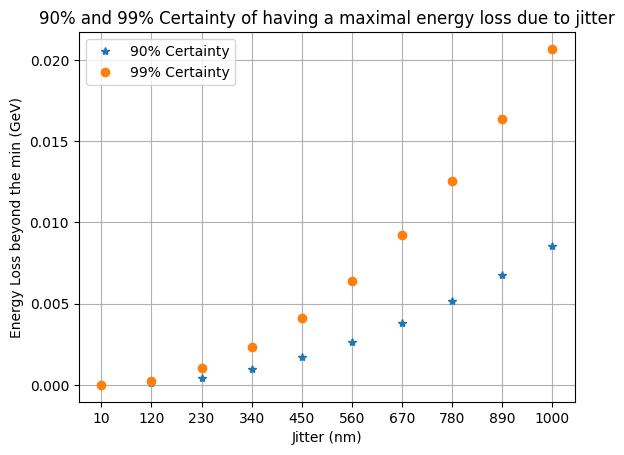

In [28]:
acceptable_jitter = 5000*0.0001
print(acceptable_jitter)
fig = plt.figure()
plt.plot(sig_jitter*1e9, (Es90-x0)/SI.e/1e9, '*', label = '90% Certainty')
plt.plot(sig_jitter*1e9, (Es99-x0)/SI.e/1e9, 'o', label = '99% Certainty')
plt.title('90% and 99% Certainty of having a maximal energy loss due to jitter')
plt.ylabel('Energy Loss beyond the min (GeV)')
plt.xticks(sig_jitter*1e9)
plt.xlabel('Jitter (nm)')
plt.legend()
plt.grid()
plt.show()
fig.savefig('Plots/certainty_plot_90_99_500GeV.png')